# **Standard Data Science Workflow (Industry-Level Notes)**

## **1. Problem Definition**

Definition: Clearly state the question the model or analysis needs to answer.
Purpose: Guides the entire project — wrong definition = wasted effort.
Process:

Understand the business/domain context.

Translate the business need into a data science problem (classification, regression, clustering, etc.).

Define success criteria (accuracy, cost savings, revenue increase).
Examples:

Predict customer churn → Classification problem (Telecom dataset).

Estimate house prices → Regression problem (California Housing).

Segment customers into groups → Clustering (Retail dataset).

## **2.Data Collection**

Definition: Gathering the data required for analysis or model building.
Purpose: High-quality and relevant data ensures reliable insights.
Process:

Collect from internal databases (SQL, CRM, ERP).

Use public datasets (sklearn, Kaggle, UCI ML repo, OpenML).

APIs (e.g., Twitter API, Google Maps API).

Web scraping if data is not readily available.
Examples:

Credit card fraud detection → Bank transaction logs.

Movie recommendation system → MovieLens dataset.

Healthcare analysis → Patient records, WHO datasets.

## **3.Data Cleaning**

Definition: Preparing raw data for analysis by fixing errors and inconsistencies.
Purpose: Clean data avoids biased or incorrect models.
Process:

Handle missing values (mean imputation, forward fill, ML imputation).

Remove or handle duplicates/outliers.

Standardize data types and formats.

Normalize units (e.g., height in cm vs inches).
Examples:

Titanic dataset → Missing Age and Cabin values.

Sales dataset → Removing duplicate invoices.

Healthcare dataset → Fixing inconsistent gender labels (“M”, “Male”).

## **4.Exploratory Data Analysis (EDA)**

Definition: Summarizing datasets to understand patterns, trends, and relationships.
Purpose: Helps identify useful features and data issues before modeling.
Process:

Summary statistics (mean, median, mode).

Visualizations: histograms, boxplots, scatterplots.

Correlation heatmaps.

Group-wise comparisons (e.g., churn rate by age).
Examples:

Iris dataset → Petal length/width scatterplot shows clear species separation.

California Housing → Heatmap shows median income highly correlates with house value.

Retail sales → Seasonal patterns visible in time series plots.

## **5.Feature Engineering**

Definition: Creating or transforming variables to improve model performance.
Purpose: Good features = better models, even with simple algorithms.
Process:

Transformation (log-scaling, standardization).

Encoding categorical variables (One-Hot, Label Encoding).

Derived features (FamilySize in Titanic, DayOfWeek from dates).

Domain-specific features (sentiment scores from text, image embeddings).
Examples:

Text classification → Convert reviews into TF-IDF vectors.

Titanic → Create IsAlone feature from family data.

E-commerce → Extract holiday season flag from date.

## **6.Model Building**

Definition: Training algorithms on data to learn patterns.
Purpose: Provides predictive power for decision-making.
Process:

Split data into train/test sets (sometimes with validation).

Choose algorithm based on problem type:

Regression → Linear Regression, Random Forest.

Classification → Logistic Regression, SVM, XGBoost.

Clustering → K-means, DBSCAN.

Deep Learning → CNNs for images, RNNs for text/time series.
Examples:

Predicting diabetes → Logistic Regression (classification).

House prices → Random Forest Regressor.

Customer segmentation → K-means clustering.


## **7.Model Evaluation**

Definition: Assessing model performance using metrics.
Purpose: Ensures the model generalizes well and meets business goals.
Process:

Classification metrics → Accuracy, Precision, Recall, F1, ROC-AUC.

Regression metrics → MSE, RMSE, MAE, R².

Handle imbalanced datasets with weighted metrics.

Perform cross-validation for robustness.
Examples:

Credit Card Fraud → Use ROC-AUC (imbalanced).

House Price Prediction → Use RMSE (continuous target).

Spam Detection → Precision and Recall are more important than accuracy.

## **8.Model Deployment**

Definition: Making the trained model available for real-world use.
Purpose: Allows end-users or systems to make predictions in real-time.
Process:

Save model (pickle, joblib, ONNX).

Deploy via APIs (Flask, FastAPI).

Build dashboards (Streamlit, Power BI, Tableau).

Monitor performance (detect drift, retrain if needed).
Examples:

Recommendation systems on Netflix or Amazon.

Fraud detection models in banks (real-time alerts).

Healthcare models integrated into hospital systems.

✅ Final Summary:
The Data Science Workflow is not just coding — it’s about combining domain knowledge, data understanding, statistical reasoning, and engineering skills to deliver real-world impact.

# Data Science Pipeline with Linnerud Dataset

This notebook walks through a **complete Data Science workflow** using the **Linnerud dataset** (built into `scikit-learn`).  
We follow the standard steps: **Problem Definition → Data Collection → Cleaning → EDA → Feature Engineering → Modeling → Evaluation → Conclusion**.

**Note for instructors:** each section contains clear explanations and reproducible code.

## **1. Problem Definition**

- **Goal:** Predict **Weight, Waist, and Pulse** (physical measurements) from **Chins, Situps, and Jumps** (exercise performance).  
- **Why:** To understand how exercise performance relates to body measurements.  
- **Problem Type:** **Multivariate Regression** (multiple continuous targets).

## **2. Data Collection**

- **Source:** `sklearn.datasets.load_linnerud`  
- **Samples:** 20 individuals  
- **Features (X - exercise data):** `Chins`, `Situps`, `Jumps`  
- **Targets (y - body measurements):** `Weight`, `Waist`, `Pulse`

In [ ]:
# Imports and dataset loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_linnerud

# Load dataset
linnerud = load_linnerud(as_frame=True)

# Features (X) and Targets (y)
X = linnerud.data.copy()
y = linnerud.target.copy()

# Combine into one DataFrame for EDA
df = pd.concat([X, y], axis=1)
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [ ]:
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


## **3. Data Cleaning**

This dataset is small and already clean, but we still **verify**:
- Check for missing values
- Check for duplicates
- Check data types

In [ ]:
# Data cleaning checks
print('Shape:', df.shape)
print('\nMissing values per column:')
print(df.isnull().sum())
print('\nDuplicate rows:', df.duplicated().sum())
print('\nData types:')
print(df.dtypes)

Shape: (20, 6)

Missing values per column:
Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

Duplicate rows: 0

Data types:
Chins     float64
Situps    float64
Jumps     float64
Weight    float64
Waist     float64
Pulse     float64
dtype: object


## **4. Exploratory Data Analysis (EDA)**

We will:
1. Inspect summary statistics
2. Visualize distributions
3. Create pairplot to see relationships
4. Create a correlation heatmap

In [ ]:
# Summary statistics
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Chins,20.0,9.45,5.286278,1.0,4.75,11.5,13.25,17.0
Situps,20.0,145.55,62.566575,50.0,101.00,122.5,210.00,251.0
Jumps,20.0,70.30,51.277470,25.0,39.50,54.0,85.25,250.0
Weight,20.0,178.60,24.690505,138.0,160.75,176.0,191.50,247.0
Waist,20.0,35.40,3.201973,31.0,33.00,35.0,37.00,46.0
Pulse,20.0,56.10,7.210373,46.0,51.50,55.0,60.50,74.0


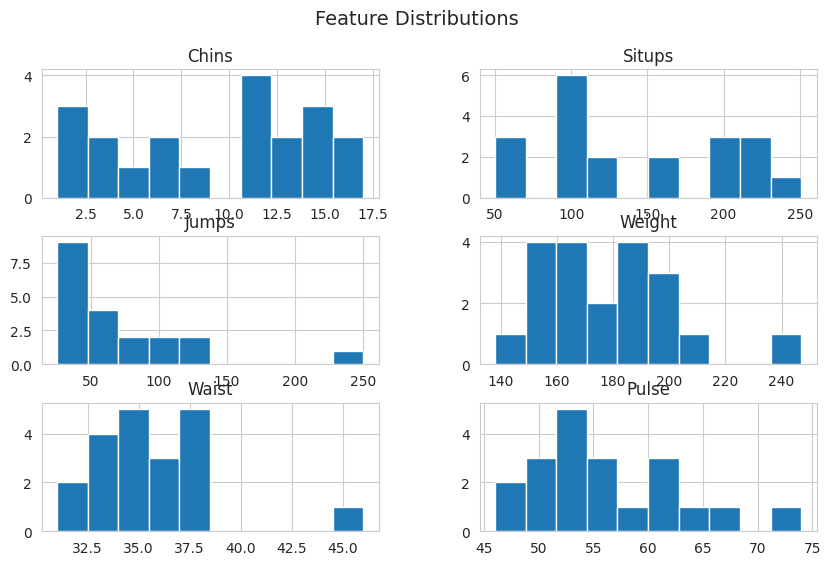

In [ ]:
# Use seaborn styling
sns.set_style("whitegrid")

# Plot histograms
df.hist(figsize=(10,6), bins=10)
plt.suptitle('Feature Distributions', fontsize=14)
plt.show()

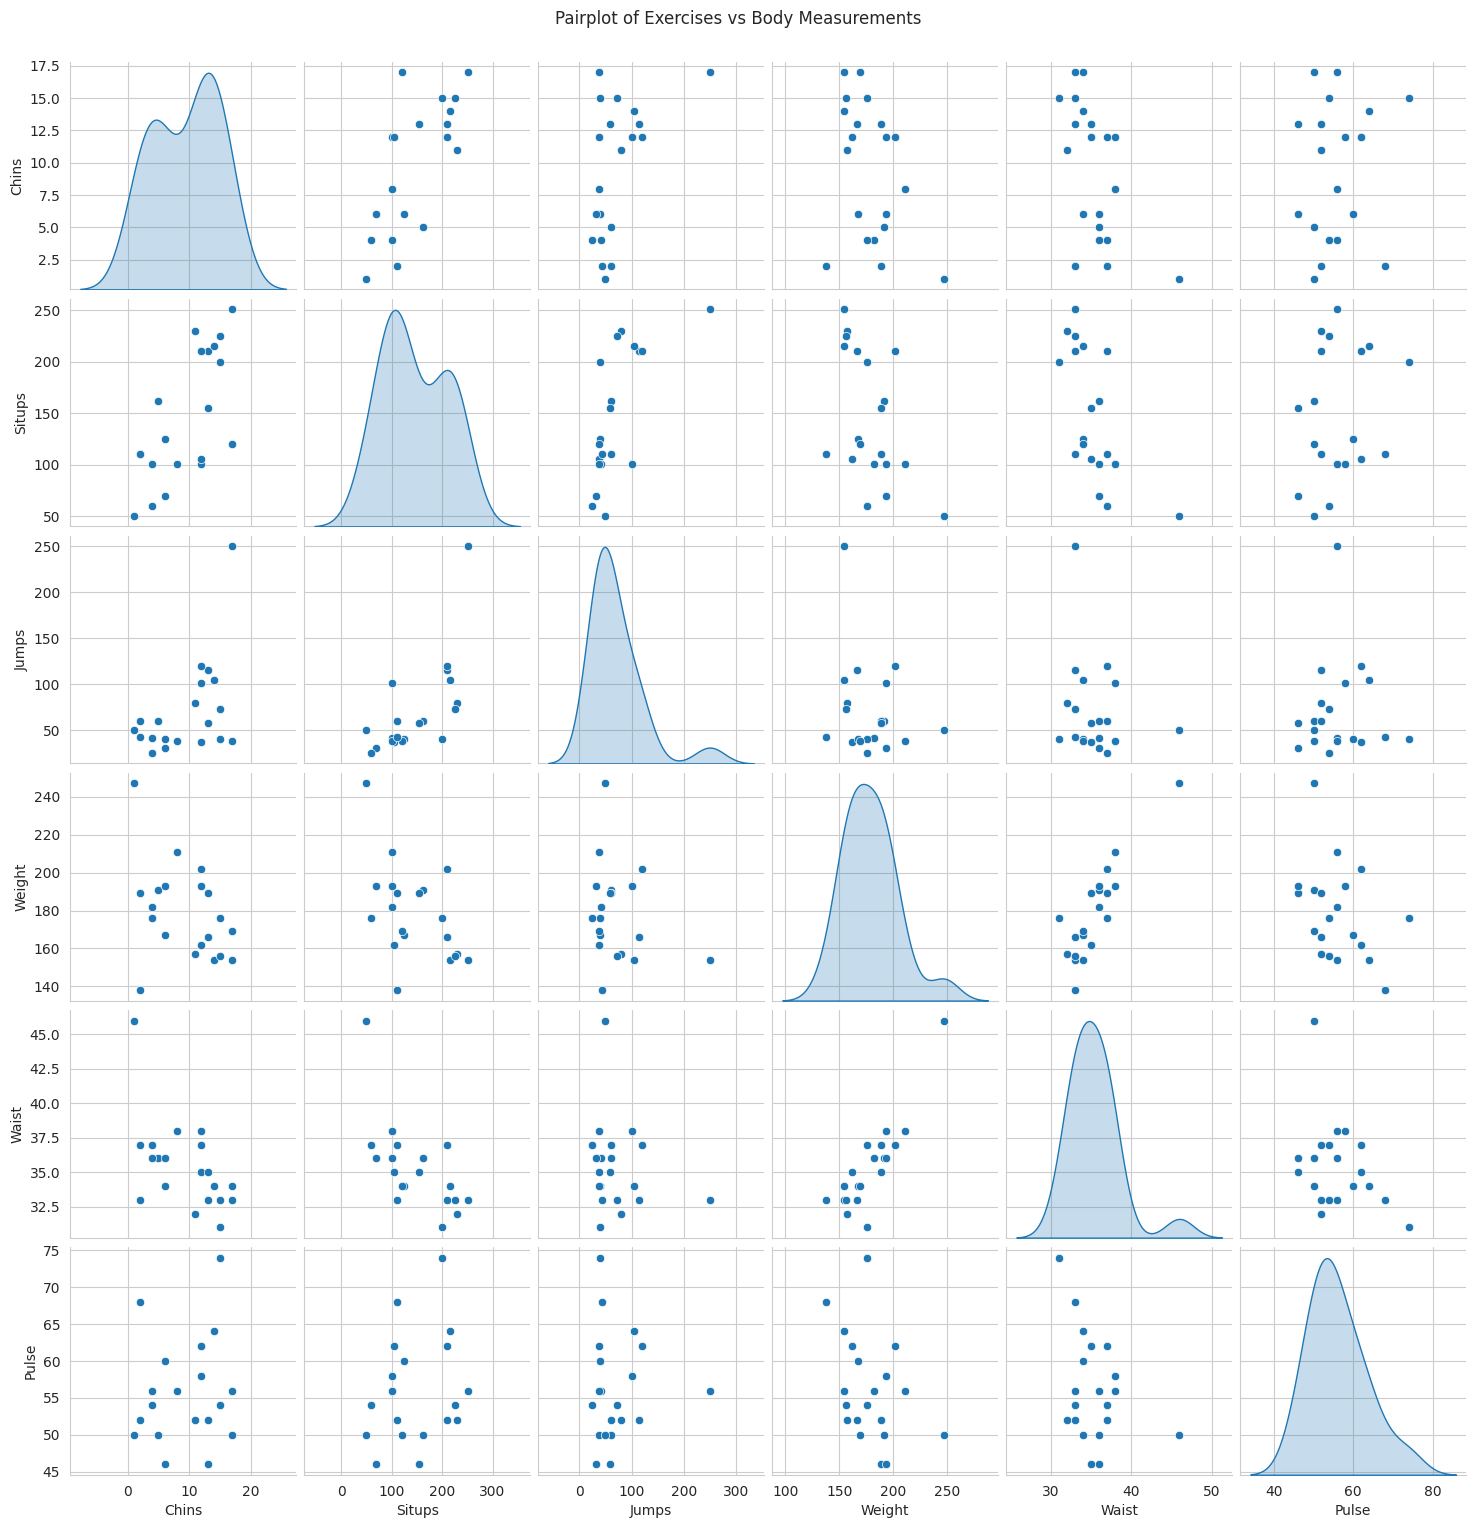

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind='kde', corner=False)
plt.suptitle('Pairplot of Exercises vs Body Measurements', y=1.02)
plt.show()

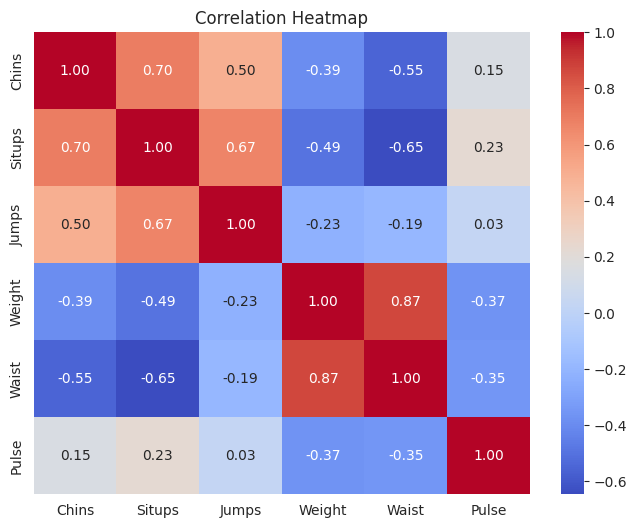

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## **5. Feature Engineering**

- Scale features (StandardScaler) because features and targets are on different scales.  
- Add a derived feature: **Total_Exercises = Chins + Situps + Jumps** for demonstration.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Derived feature
df['Total_Exercises'] = df['Chins'] + df['Situps'] + df['Jumps']

# Scale the original exercise features (Chins, Situps, Jumps)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scaled numpy array

# Show updated dataframe head
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse,Total_Exercises
0,5.0,162.0,60.0,191.0,36.0,50.0,227.0
1,2.0,110.0,60.0,189.0,37.0,52.0,172.0
2,12.0,101.0,101.0,193.0,38.0,58.0,214.0
3,12.0,105.0,37.0,162.0,35.0,62.0,154.0
4,13.0,155.0,58.0,189.0,35.0,46.0,226.0


Chins	Situps	Jumps	Weight	Waist	Pulse	Total_Exercises

0.005 0.162   0.060 0.191   0.036 0.050 0.227

Scaling in machine learning involves transforming numerical features in a dataset to a common range or scale, such as between 0 and 1, to prevent features with larger values from dominating the model and to improve the efficiency and performance of algorithms

**scaler = StandardScaler()**

Creates a scaler object (nothing happens yet).

**scaler.fit(X)** (inside fit_transform)

Calculates the mean and standard deviation for each feature column in X.

**scaler.transform(X)**(inside fit_transform)

Uses those mean & std values to scale every feature value into the standardized range.

**X_scaled**

The transformed data, where each feature has mean ≈ 0 and std ≈ 1.

## **6. Model Building**

- We'll perform a train/test split and fit a **Linear Regression** model that supports multi-output regression.  
- For teaching clarity we use a simple algorithm first (LinearRegression).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train-test split (use scaled X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate and train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Show predictions vs actual as a small table
pred_df = pd.DataFrame(y_pred, columns=y.columns)
pred_df.index = range(len(pred_df))
actual_df = y_test.reset_index(drop=True)
comparison = pd.concat([actual_df, pred_df], axis=1)
comparison.columns = ['Weight_actual','Waist_actual','Pulse_actual','Weight_pred','Waist_pred','Pulse_pred']
comparison

,Weight_actual,Waist_actual,Pulse_actual,Weight_pred,Waist_pred,Pulse_pred
0,191.0,36.0,50.0,166.299446,34.349313,61.692687
1,157.0,32.0,52.0,149.165443,31.140784,64.132980
2,202.0,37.0,62.0,159.626702,33.151725,59.782455
3,189.0,37.0,52.0,181.509420,37.106506,58.293805


## **7. Model Evaluation**

We evaluate the multi-output regression model using:
- **R² Score** per target
- **MAE** (Mean Absolute Error) per target
- **MSE** (Mean Squared Error) per target

Because the dataset is tiny, scores may be unstable; treat this as educational.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

for i, col in enumerate(y.columns):
    r2 = r2_score(y_test[col], y_pred[:, i])
    mae = mean_absolute_error(y_test[col], y_pred[:, i])
    mse = mean_squared_error(y_test[col], y_pred[:, i])
    print(f"Target: {col}")
    print(f"  R²:  {r2:.3f}")
    print(f"  MAE: {mae:.3f}")
    print(f"  MSE: {mse:.3f}\n")

Target: Weight
  R²:  -1.243
  MAE: 20.600
  MSE: 630.776

Target: Waist
  R²:  -0.076
  MAE: 1.616
  MSE: 4.571

Target: Pulse
  R²:  -2.732
  MAE: 8.084
  MSE: 82.114




Evaluation (test set):
                  R2_Weight  MAE_Weight  MSE_Weight  R2_Waist  MAE_Waist  \
model                                                                      
LinearRegression    -2.1996     20.4257    632.8915    0.4881     1.2467   
RandomForest        -1.1903     17.3808    433.2591    0.1366     2.0717   
SVR                 -1.3926     18.4227    473.2710   -0.0503     2.2454   

                  MSE_Waist  R2_Pulse  MAE_Pulse  MSE_Pulse  mean_R2  
model                                                                 
LinearRegression     2.9721   -0.3213     7.9385    90.5791  -0.6776  
RandomForest         5.0128   -0.5262     8.3800   104.6266  -0.5266  
SVR                  6.0976   -0.7387     8.7130   119.1968  -0.7272  

Best model by mean R2: RandomForest (mean R2 = -0.5266)


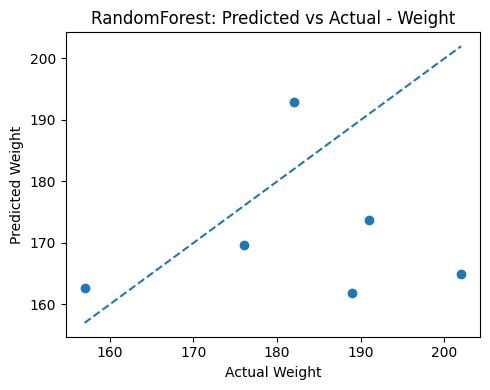

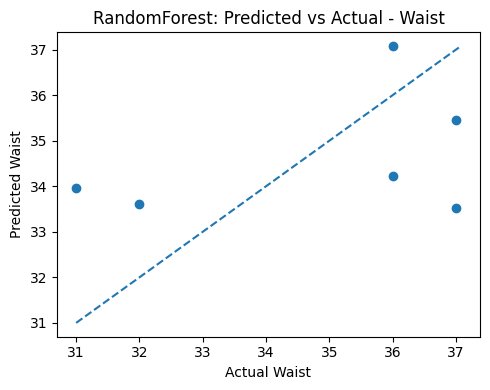

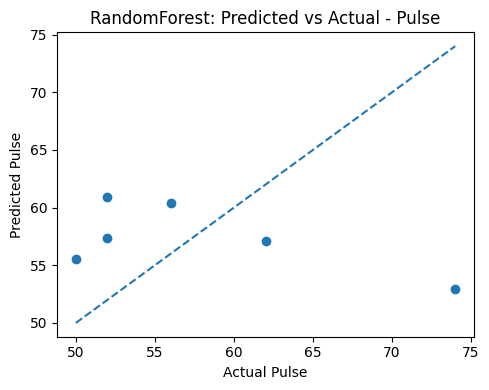


Recommendations:
- If mean R2 is low or negative, features do not explain targets well -> collect more features or samples.
- RandomForest often helps capture nonlinear patterns; SVR can work but tune C/epsilon and scale features.
- Consider feature selection, interactions or domain features (age, diet, BMI) for better prediction.


In [ ]:
# multivariate_regression_linnerud.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# -----------------------
# 1. Load data
# -----------------------
data = load_linnerud()
X = pd.DataFrame(data.data, columns=data.feature_names)   # chins, situps, jumps
y = pd.DataFrame(data.target, columns=data.target_names)  # Weight, Waist, Pulse

# Optional: derived feature
X['Total_Exercises'] = X['Chins'] + X['Situps'] + X['Jumps']

# -----------------------
# 2. Scale features
# -----------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # returns numpy array

# -----------------------
# 3. Train/test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# -----------------------
# 4. Define models (multi-output wrappers)
# -----------------------
models = {
    "LinearRegression": MultiOutputRegressor(LinearRegression()),
    "RandomForest": MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42)),
    "SVR": MultiOutputRegressor(SVR(kernel='rbf', C=10, epsilon=0.1))
}

# -----------------------
# 5. Train, predict, evaluate
# -----------------------
results = []
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)               # shape (n_test, n_targets)
    predictions[name] = y_pred
    row = {"model": name}
    for i, col in enumerate(y.columns):
        row[f"R2_{col}"] = r2_score(y_test.iloc[:, i], y_pred[:, i])
        row[f"MAE_{col}"] = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
        row[f"MSE_{col}"] = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    results.append(row)

results_df = pd.DataFrame(results).set_index("model")
results_df["mean_R2"] = results_df[[c for c in results_df.columns if c.startswith("R2_")]].mean(axis=1)

print("\nEvaluation (test set):")
print(results_df.round(4))

# -----------------------
# 6. Choose best model by mean R2 and plot Predicted vs Actual
# -----------------------
best_model_name = results_df["mean_R2"].idxmax()
best_pred = predictions[best_model_name]

print(f"\nBest model by mean R2: {best_model_name} (mean R2 = {results_df.loc[best_model_name,'mean_R2']:.4f})")

for i, col in enumerate(y.columns):
    plt.figure(figsize=(5,4))
    plt.scatter(y_test.iloc[:, i], best_pred[:, i])
    mn = min(y_test.iloc[:, i].min(), best_pred[:, i].min())
    mx = max(y_test.iloc[:, i].max(), best_pred[:, i].max())
    plt.plot([mn, mx], [mn, mx], linestyle='--')  # y=x line
    plt.xlabel(f"Actual {col}")
    plt.ylabel(f"Predicted {col}")
    plt.title(f"{best_model_name}: Predicted vs Actual - {col}")
    plt.tight_layout()
    plt.show()

# -----------------------
# 7. Quick recommendations printout
# -----------------------
print("\nRecommendations:")
print("- If mean R2 is low or negative, features do not explain targets well -> collect more features or samples.")
print("- RandomForest often helps capture nonlinear patterns; SVR can work but tune C/epsilon and scale features.")
print("- Consider feature selection, interactions or domain features (age, diet, BMI) for better prediction.")


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Define predictors (features) and targets (multiple outputs)
X = df[['Chins', 'Situps', 'Jumps']]  # or use X_scaled if you want scaled features
y = df[['Weight', 'Waist', 'Pulse']]  # multiple target variables

# Initialize and fit multivariate regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Convert predictions to dataframe for readability
pred_df = pd.DataFrame(y_pred, columns=['Pred_Weight', 'Pred_Waist', 'Pred_Pulse'])
print(pred_df.head())

# Check model performance (R² score for each output)
r2_scores = model.score(X, y)
print("Overall R² score:", r2_scores)

# Optional: Check coefficients
coef_df = pd.DataFrame(model.coef_, columns=X.columns, index=['Weight', 'Waist', 'Pulse'])
print("\nRegression Coefficients:")
print(coef_df)


   Pred_Weight  Pred_Waist  Pred_Pulse
0   176.173621   35.057407   57.090069
1   188.919957   37.565522   54.901327
2   189.945764   37.706767   53.325862
3   183.117243   35.755110   55.379495
4   173.711249   34.188854   56.863352
Overall R² score: 0.2968779120881459

Regression Coefficients:
           Chins    Situps     Jumps
Weight -0.475026 -0.217716  0.093088
Waist  -0.136870 -0.040337  0.027974
Pulse   0.001071  0.042029 -0.029461


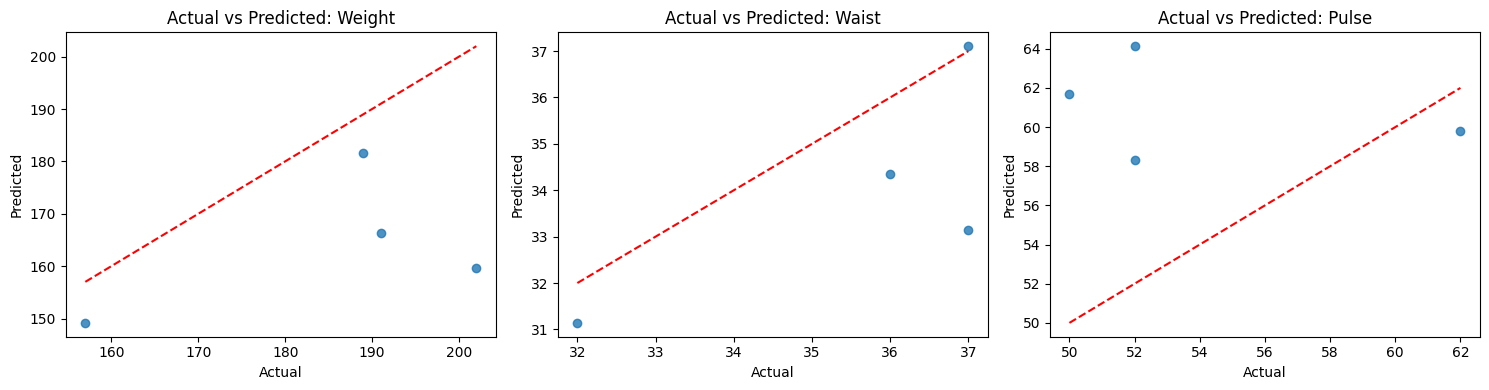

In [ ]:
# Plot actual vs predicted for each target
fig, axes = plt.subplots(1, 3, figsize=(15,4))
targets = y.columns.tolist()
for i, ax in enumerate(axes):
    ax.scatter(y_test[targets[i]], y_pred[:, i], alpha=0.8)
    ax.plot([y_test[targets[i]].min(), y_test[targets[i]].max()],
            [y_test[targets[i]].min(), y_test[targets[i]].max()],
            'r--')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(f'Actual vs Predicted: {targets[i]}')
plt.tight_layout()
plt.show()

## **8. Conclusion**

- We demonstrated a full **Data Science pipeline** on the Linnerud dataset:
  - Problem definition, data loading, EDA, feature engineering, modeling, and evaluation.
- **Key takeaways:**
  - The dataset is small (20 samples) so any model results are illustrative, not production-ready.
  - Linear Regression can model relationships but additional data or more complex models may improve performance.
  - Feature scaling is important when inputs are on different scales.
- **Next steps (for students):**
  - Try Ridge/Lasso regression to add regularization.
  - Try tree-based models (RandomForest) and compare.
  - Collect more data or augment synthetically for better modeling.
